importing Necessary Libraries

In [117]:
# !pip install yfinance

In [118]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,BatchNormalization,SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [119]:
data = yf.download("RELIANCE.NS")
data.columns = data.columns.droplevel(1)
data.reset_index(inplace = True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,1996-01-01,3.619125,7.345901,7.358397,7.270925,7.319124,104121369
1,1996-01-02,3.590981,7.288776,7.363753,7.235222,7.328050,168743308
2,1996-01-03,3.618245,7.344116,7.745775,7.328050,7.408381,209323879
3,1996-01-04,3.584825,7.276280,7.297702,7.178097,7.274495,216900264
4,1996-01-05,3.560199,7.226296,7.247718,7.163816,7.247718,166708467


In [125]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [126]:
data = data['Close']
data.head()

,Close
0,7.345901
1,7.288776
2,7.344116
3,7.276280
4,7.226296


In [127]:
data.isnull().sum()

0

In [129]:
scaler = MinMaxScaler(feature_range=(0,1))
data = np.array(data)
data = scaler.fit_transform(data.reshape(-1,1))

In [130]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [131]:
data.shape,train_data.shape,test_data.shape

((7269, 1), (5815, 1), (1454, 1))

In [132]:
time_step = 100
X_train = []
y_train = []

for i in range(time_step,len(train_data)):
  X_train.append(train_data[i-time_step:i])
  y_train.append(train_data[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [133]:
X_train.shape,y_train.shape

((5715, 100, 1), (5715,))

In [134]:
time_step = 100
X_test = []
y_test = []

for i in range(time_step,len(test_data)):
  X_test.append(test_data[i-time_step:i])
  y_test.append(test_data[i,0])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [135]:
X_test.shape,y_test.shape

((1354, 100, 1), (1354,))

In [136]:

model = Sequential()

model.add(tf.keras.layers.Input(shape = (X_train.shape[1],X_train.shape[2]) ))
model.add(LSTM(100,return_sequences = True ))
model.add(LSTM(100,return_sequences = True ))
model.add(LSTM(100,return_sequences = True ))
model.add(LSTM(128, ))
model.add(Dense(128,activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(1))

In [137]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_15               │ (None, 100, 100)            │             200 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_16               │ (None, 100, 100)            │             200 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_17               │ (None, 100, 100)            │             200 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_18               │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,857 (1.29 MB)

 Trainable params: 336,601 (1.28 MB)

 Non-trainable params: 256 (1.00 KB)

In [138]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mse'])

In [139]:
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor = "val_loss",
    mode = "min",
    save_best_only = True,
    save_weights_only = False,
    verbose = 1
)

In [140]:
# history = model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test),callbacks = [checkpoint])

In [141]:
from tensorflow.keras.models import load_model

model = load_model('best_model.keras')
# history = model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test),callbacks = [checkpoint])

In [142]:
test_prices = scaler.inverse_transform(y_test.reshape(-1,1))

In [143]:
test_prices

array([[ 577.12683105],
       [ 592.41900635],
       [ 591.6418457 ],
       ...,
       [1284.84997559],
       [1278.19995117],
       [1273.09997559]])

In [144]:

test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


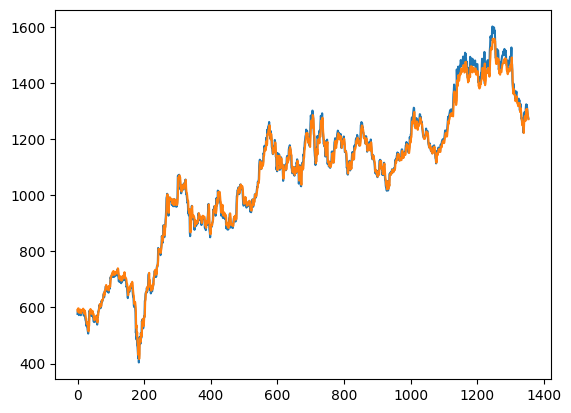

In [145]:
plt.plot(test_prices)
plt.plot(test_predictions)

In [146]:

train_predictions = model.predict(X_train)


train_predictions_rescaled = scaler.inverse_transform(train_predictions)

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [147]:
train_predictions_rescaled

array([[  6.4780807],
       [  6.231894 ],
       [  6.1767454],
       ...,
       [523.1494   ],
       [523.3688   ],
       [543.0042   ]], dtype=float32)

In [148]:
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1,1))
y_train_rescaled

array([[  8.65263271],
       [  8.62228489],
       [  8.66869926],
       ...,
       [518.63238525],
       [541.44494629],
       [565.83477783]])

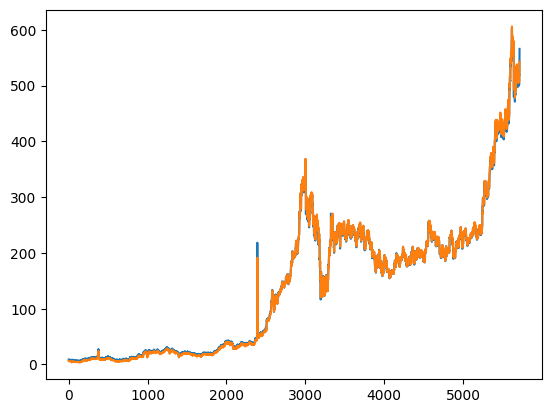

In [149]:
plt.plot(y_train_rescaled)
plt.plot(train_predictions_rescaled)



In [150]:
actual_close = scaler.inverse_transform(data)
actual_close

array([[   7.34590101],
       [   7.28877592],
       [   7.34411621],
       ...,
       [1284.84997559],
       [1278.19995117],
       [1273.09997559]])

In [167]:
lookback = 100
train_pred_aligned = np.empty_like(actual_close)
train_pred_aligned[:] = np.nan
train_pred_aligned[lookback:lookback + len(train_predictions_rescaled)] = train_predictions_rescaled

test_index_start = len(train_predictions_rescaled)+ lookback*2
test_pred_aligned = np.empty_like(actual_close)
test_pred_aligned[:] = np.nan
test_pred_aligned[test_index_start:test_index_start + len(test_predictions)] = test_predictions

In [159]:
len(actual_close),data.shape[0]

(7269, 7269)

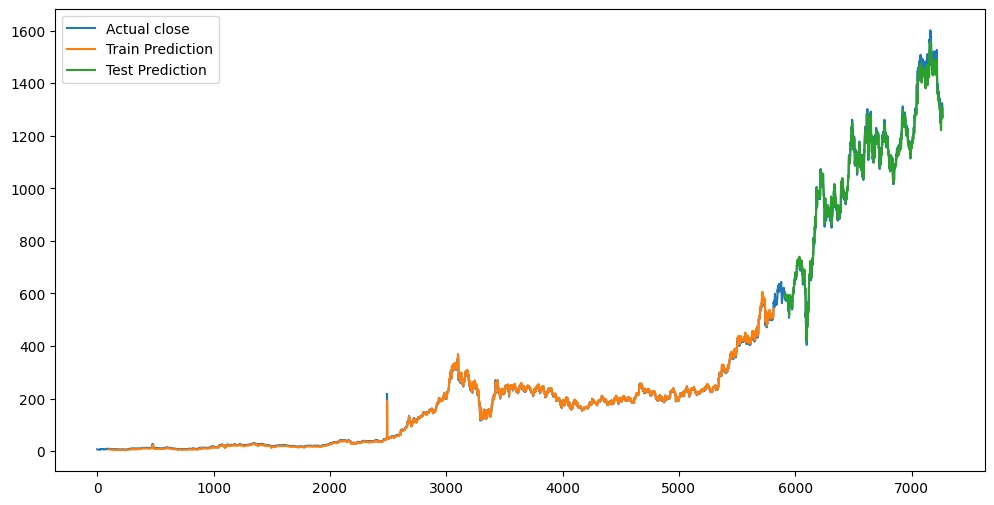

In [171]:
plt.figure(figsize = (12,6))
plt.plot(actual_close,label= "Actual close")
plt.plot(train_pred_aligned,label = "Train Prediction")
plt.plot(test_pred_aligned,label = "Test Prediction")
plt.legend()